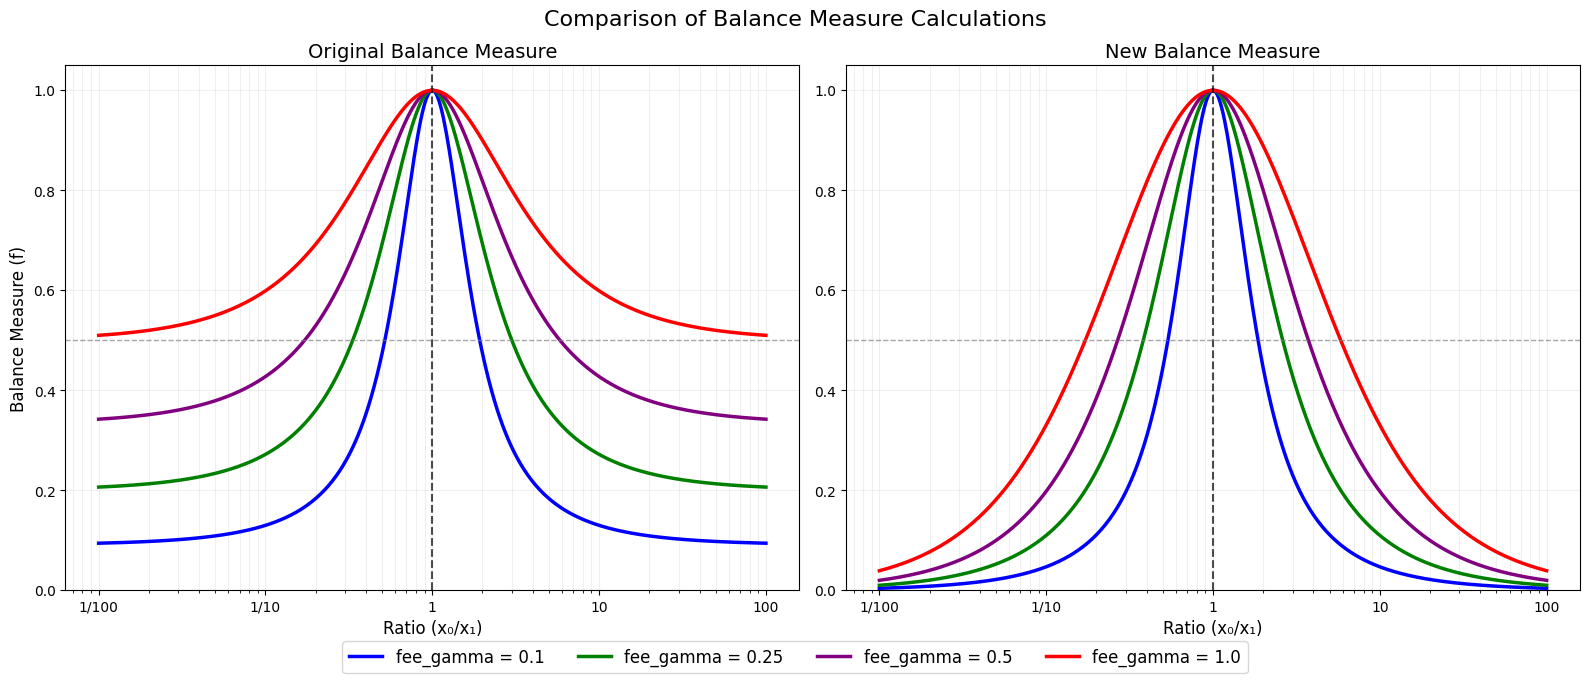

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
from matplotlib.colors import LogNorm, Normalize
import matplotlib.colors as colors

def calculate_balance_measure(x0, x1, fee_gamma, mode="old"):
    """Calculate the balance measure f based on the contract implementation"""
    N = 2
    sum_x = x0 + x1
    if sum_x == 0:
        return 0
    
    # Calculate the balance term - this matches the contract implementation
    balance_term = (N**N * x0 * x1) / (sum_x**2)
    if mode == "old":
        f = fee_gamma / (fee_gamma + 1 - balance_term)
    elif mode == "new":
        f = fee_gamma * balance_term / (fee_gamma * balance_term + 1 - balance_term)
    return f

def create_balance_measure_plot(fee_gammas, mode="old"):
    """Create a plot for a specific mode (old or new)"""
    # Create logarithmically spaced ratios for x-axis (x₀/x₁)
    ratios = np.logspace(-2, 2, 500)  # Ratio from 1/100 to 100
    
    # Fixed total amount
    total = 100
    
    # Colors for the plots
    colors = ['blue', 'green', 'purple', 'red']
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calculate and plot balance measures for each fee_gamma
    for i, fee_gamma in enumerate(fee_gammas):
        balance_measures = []
        for ratio in ratios:
            # Calculate x0 and x1 from ratio and total
            x1 = total / (1 + ratio)
            x0 = total - x1
            
            # Calculate balance measure
            balance_measures.append(calculate_balance_measure(x0, x1, fee_gamma, mode))
        
        # Plot the balance measure
        ax.plot(ratios, balance_measures, color=colors[i], linewidth=2.5, label=f'fee_gamma = {fee_gamma}')
    
    # Set logarithmic scale for x-axis
    ax.set_xscale('log')
    
    # Set y-axis limits
    ax.set_ylim(0, 1.05)
    
    # Add labels
    ax.set_xlabel('Ratio (x₀/x₁)', fontsize=12)
    ax.set_ylabel('Balance Measure (f)', fontsize=12)
    
    # Add title based on mode
    title = "Original Balance Measure" if mode == "old" else "New Balance Measure"
    ax.set_title(title, fontsize=14)
    
    # Add vertical line at ratio = 1 (balanced pool)
    ax.axvline(x=1, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Balanced (x₀/x₁ = 1)')
    
    # Add horizontal line at balance measure = 0.5
    ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='f = 0.5')
    
    # Add grid
    ax.grid(True, which="both", ls="-", alpha=0.2)
    
    # Add custom x-axis tick labels
    ax.set_xticks([0.01, 0.1, 1, 10, 100])
    ax.set_xticklabels(['1/100', '1/10', '1', '10', '100'])
    
    # Add legend
    ax.legend(fontsize=10, loc='lower center')
    
    return fig, ax

def plot_side_by_side_comparison():
    """Create a side-by-side comparison of old and new balance measure calculations"""
    # Fee gamma values to compare
    fee_gammas = [0.1, 0.25, 0.5, 1.0]
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # Colors for the plots
    colors = ['blue', 'green', 'purple', 'red']
    
    # Create logarithmically spaced ratios for x-axis (x₀/x₁)
    ratios = np.logspace(-2, 2, 500)  # Ratio from 1/100 to 100
    
    # Fixed total amount
    total = 100
    
    # Process both modes
    for mode_idx, mode in enumerate(["old", "new"]):
        ax = ax1 if mode_idx == 0 else ax2
        
        # Calculate and plot balance measures for each fee_gamma
        for i, fee_gamma in enumerate(fee_gammas):
            balance_measures = []
            for ratio in ratios:
                # Calculate x0 and x1 from ratio and total
                x1 = total / (1 + ratio)
                x0 = total - x1
                
                # Calculate balance measure
                balance_measures.append(calculate_balance_measure(x0, x1, fee_gamma, mode))
            
            # Plot the balance measure
            ax.plot(ratios, balance_measures, color=colors[i], linewidth=2.5, label=f'fee_gamma = {fee_gamma}')
        
        # Set logarithmic scale for x-axis
        ax.set_xscale('log')
        
        # Set y-axis limits
        ax.set_ylim(0, 1.05)
        
        # Add labels
        ax.set_xlabel('Ratio (x₀/x₁)', fontsize=12)
        if mode_idx == 0:
            ax.set_ylabel('Balance Measure (f)', fontsize=12)
        
        # Add title based on mode
        title = "Original Balance Measure" if mode == "old" else "New Balance Measure"
        ax.set_title(title, fontsize=14)
        
        # Add vertical line at ratio = 1 (balanced pool)
        ax.axvline(x=1, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
        
        # Add horizontal line at balance measure = 0.5
        ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
        
        # Add grid
        ax.grid(True, which="both", ls="-", alpha=0.2)
        
        # Add custom x-axis tick labels
        ax.set_xticks([0.01, 0.1, 1, 10, 100])
        ax.set_xticklabels(['1/100', '1/10', '1', '10', '100'])
    
    # Add a single legend for the entire figure
    handles, labels = ax1.get_legend_handles_labels()
    handles = handles[:4]  # Just keep the fee_gamma labels, not the lines
    fig.legend(handles, [f'fee_gamma = {g}' for g in fee_gammas], 
               loc='lower center', ncol=4, fontsize=12, bbox_to_anchor=(0.5, 0.02))
    
    # Add a common title
    fig.suptitle('Comparison of Balance Measure Calculations', fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15, top=0.9)  # Make room for the legend and title
    
    return fig

# Run the plots
if __name__ == "__main__":
    fig = plot_side_by_side_comparison()
    plt.show()
